In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Visualize time series

In [ ]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime # access datetime
from pandas import Series
import warnings #To ignore warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Technical Test Continuum/hasil sentimen akhir/hasil akhir sentimen.csv')
data = data.drop(['Unnamed: 0', 'index'], axis=1)
data.head()

,Tanggal,Username,Tweet_In,Tweet_En,Polarity,Sentiment
0,2021-11-02 11:42:02,suhailisallehh,olathee for now isnin wfh kickstart for the we...,olathee for now monday wfh kickstart for the w...,0.600,Positif
1,2021-11-02 11:41:57,ckerelrizal,kau jenis kerja wfh,you kind of work wfh,0.600,Positif
2,2021-11-02 11:38:52,urhome69,bener ri desember 2019 bilang gini planning tu...,true ri december 2019 said this planning was m...,0.225,Positif
3,2021-11-02 11:36:44,yunita_aulia,udah wfh sampe lupa ritme jalanan capek bgt badan,already wfh until i forget the rhythm of the r...,-0.400,Negatif
4,2021-11-02 11:35:18,ionpmp,udah level 1 besok wfh 25 seminggu jadwal wfhnya,already level 1 tomorrow wfh 25 a week wfh sch...,0.000,Netral


In [ ]:
data.dtypes

Tanggal       object
Username      object
Tweet_In      object
Tweet_En      object
Polarity     float64
Sentiment     object
dtype: object

In [ ]:
# make an original copy

data_ori = data.copy()

In [ ]:
data['Tanggal'] = pd.to_datetime(data.Tanggal, format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Split 'Tanggal' into hour, day, month, year

data['Tahun'] = data['Tanggal'].dt.year
data['Bulan'] = data['Tanggal'].dt.month
data['Hari'] = data['Tanggal'].dt.day
data['Jam'] = data['Tanggal'].dt.hour

In [ ]:
# Extract day of week

data['Day_of_Week'] = data['Tanggal'].dt.dayofweek

# Assign weekday and weekend

def dayweek(row):
  if row.dayofweek == 5 or row.dayofweek == 6:
    return 'weekend'
  else:
    return 'weekday'

data['Type_of_Week'] = data['Tanggal'].apply(dayweek)

In [ ]:
data.head()

,Tanggal,Username,Tweet_In,Tweet_En,Polarity,Sentiment,Tahun,Bulan,Hari,Jam,Day_of_Week,Type_of_Week
0,2021-11-02 11:42:02,suhailisallehh,olathee for now isnin wfh kickstart for the we...,olathee for now monday wfh kickstart for the w...,0.600,Positif,2021,11,2,11,1,weekday
1,2021-11-02 11:41:57,ckerelrizal,kau jenis kerja wfh,you kind of work wfh,0.600,Positif,2021,11,2,11,1,weekday
2,2021-11-02 11:38:52,urhome69,bener ri desember 2019 bilang gini planning tu...,true ri december 2019 said this planning was m...,0.225,Positif,2021,11,2,11,1,weekday
3,2021-11-02 11:36:44,yunita_aulia,udah wfh sampe lupa ritme jalanan capek bgt badan,already wfh until i forget the rhythm of the r...,-0.400,Negatif,2021,11,2,11,1,weekday
4,2021-11-02 11:35:18,ionpmp,udah level 1 besok wfh 25 seminggu jadwal wfhnya,already level 1 tomorrow wfh 25 a week wfh sch...,0.000,Netral,2021,11,2,11,1,weekday


In [ ]:
# Visualize time series

data.index = data['Tanggal']
ts = data['Tweet_In']

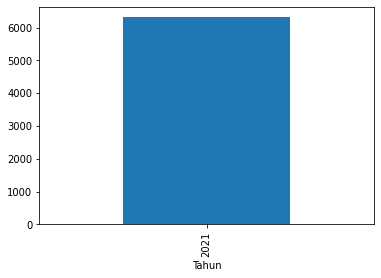

In [ ]:
# Tahun
data.groupby('Tahun')['Tweet_In'].count().plot.bar()

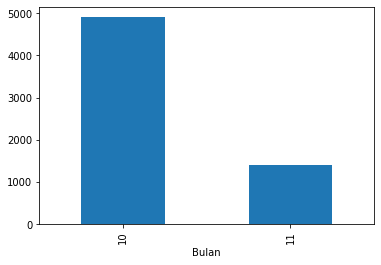

In [ ]:
# Bulan
data.groupby('Bulan')['Tweet_In'].count().plot.bar()

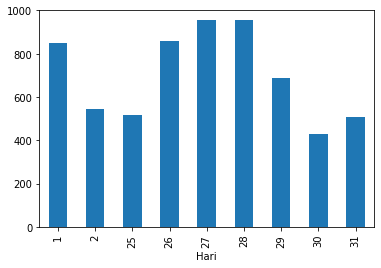

In [ ]:
# Hari
data.groupby('Hari')['Tweet_In'].count().plot.bar()

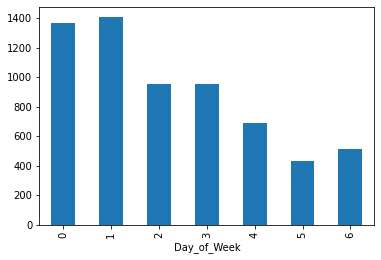

In [ ]:
# Day of week
data.groupby('Day_of_Week')['Tweet_In'].count().plot.bar()

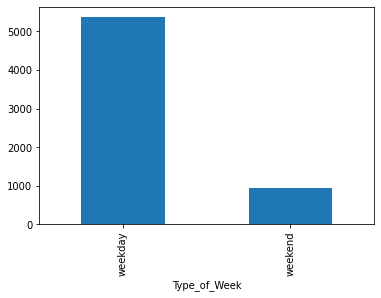

In [ ]:
# Type of week
data.groupby('Type_of_Week')['Tweet_In'].count().plot.bar()

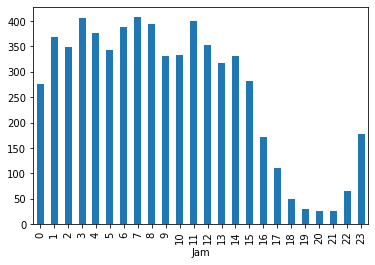

In [ ]:
# Jam
data.groupby('Jam')['Tweet_In'].count().plot.bar()

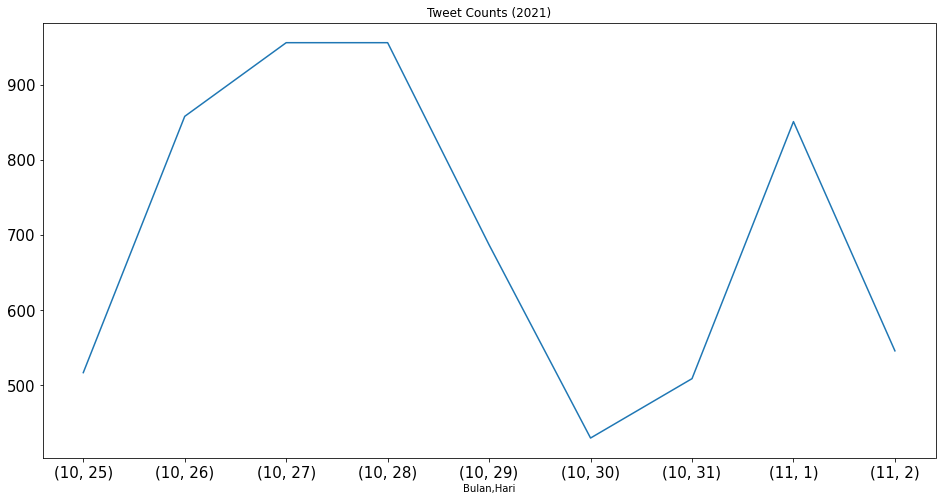

In [ ]:
# Time Series

temp = data.groupby(['Bulan', 'Hari'])['Tweet_In'].count()
temp.plot(figsize=(16,8),
          title='Tweet Counts (2021)',
          fontsize=15)

In [ ]:
# User
data.nunique()

Tanggal         6266
Username        5414
Tweet_In        5394
Tweet_En        5436
Polarity         511
Sentiment          3
Tahun              1
Bulan              2
Hari               9
Jam               24
Day_of_Week        7
Type_of_Week       2
dtype: int64

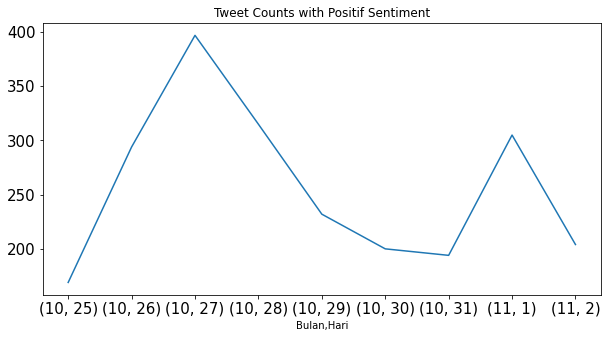

In [ ]:
# Sentimen positif

positif = data.loc[data['Sentiment']=='Positif']
temp_pos = positif.groupby(['Bulan', 'Hari'])['Tweet_In'].count()
temp_pos.plot(figsize=(10,5),
          title='Tweet Counts with Positif Sentiment',
          fontsize=15)

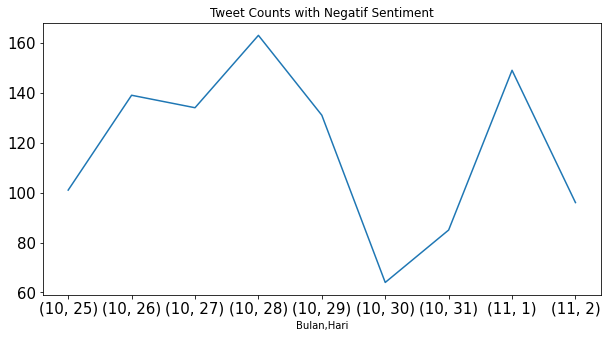

In [ ]:
# Sentimen Negatif

negatif= data.loc[data['Sentiment']=='Negatif']
temp_neg = negatif.groupby(['Bulan', 'Hari'])['Tweet_In'].count()
temp_neg.plot(figsize=(10,5),
          title='Tweet Counts with Negatif Sentiment',
          fontsize=15)

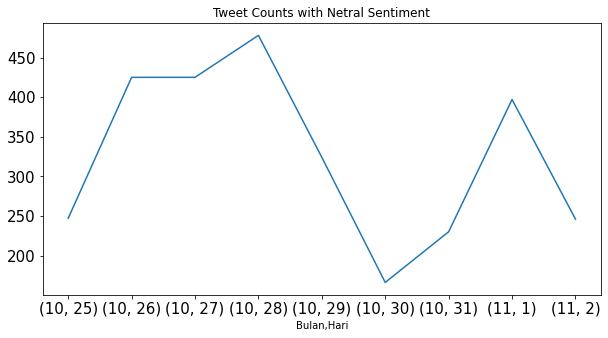

In [ ]:
# Sentimen Netral

netral= data.loc[data['Sentiment']=='Netral']
temp_net = netral.groupby(['Bulan', 'Hari'])['Tweet_In'].count()
temp_net.plot(figsize=(10,5),
          title='Tweet Counts with Netral Sentiment',
          fontsize=15)